## Analyze Stock (Price) Performance with Linear Regression and Hypothesis Testing Using Python

### Task 1: Load and inspect the Stock Price Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
pd.options.display.float_format = "{:,.2f}".format

In [2]:
prices = pd.read_csv("stock_prices.csv", index_col = "Date", parse_dates = ["Date"])
prices

,AAPL,AJG,AVB,DLR,ICE,INCY,KHC,LLY,MCHP,MDT,MOH,NDAQ,PRU,STLD,TER
Date,,,,,,,,,,,,,,,
2019-12-31,73.41,95.23,209.70,119.74,92.55,87.32,32.13,131.43,52.36,113.45,135.69,35.70,93.74,34.04,68.19
2020-01-02,75.09,95.51,207.24,118.00,92.67,85.97,31.61,132.21,53.80,114.56,133.37,35.94,94.84,33.80,69.68
2020-01-03,74.36,95.31,209.23,119.94,94.67,77.90,31.24,131.77,52.62,113.88,132.54,36.09,93.26,33.20,68.23
2020-01-06,74.95,95.75,209.58,118.86,94.70,77.34,31.31,132.26,51.87,114.89,137.35,36.07,93.49,33.10,66.75
2020-01-07,74.60,94.72,205.02,117.69,94.43,77.14,30.76,132.51,55.35,114.49,139.26,35.47,93.39,33.83,68.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.86,188.41,163.03,100.87,102.81,81.36,40.52,367.90,69.93,77.50,335.08,61.28,99.56,102.59,86.56
2022-12-27,130.03,189.28,162.80,100.35,102.11,79.59,40.96,364.88,69.03,77.64,334.37,60.98,99.35,102.90,84.76
2022-12-28,126.04,187.95,161.08,99.40,102.27,79.44,40.44,365.22,67.87,76.30,332.42,60.70,98.37,99.89,84.24


### Column Information (stock_prices.csv)

- AAPL: Daily Stock Prices for Apple Inc.
- AJG: Daily Stock Prices for Arthur J. Gallagher & Co.
- AVB: Daily Stock Prices for AvalonBay Communities Inc.
- DLR: Daily Stock Prices for Digital Realty Trust Inc.
- ICE: Daily Stock Prices for Intercontinental Exchange Inc.
- INCY: Daily Stock Prices for Incyte Corporation
- KHC: Daily Stock Prices for The Kraft Heinz Company
- LLY: Daily Stock Prices for Eli Lilly And Co.
- MCHP: Daily Stock Prices for Microchip Technology Inc.
- MDT: Daily Stock Prices for Medtronic PLC
- MOH: Daily Stock Prices for Molina Healthcare Inc.
- NDAQ: Daily Stock Prices for Nasdaq Inc.
- PRU: Daily Stock Prices for Prudential Financial Inc.
- STLD: Daily Stock Prices for Steel Dynamics
- TER: Daily Stock Prices for Teradyne Inc.

In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-12-31 to 2022-12-30
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    757 non-null    float64
 1   AJG     757 non-null    float64
 2   AVB     757 non-null    float64
 3   DLR     757 non-null    float64
 4   ICE     757 non-null    float64
 5   INCY    757 non-null    float64
 6   KHC     757 non-null    float64
 7   LLY     757 non-null    float64
 8   MCHP    757 non-null    float64
 9   MDT     757 non-null    float64
 10  MOH     757 non-null    float64
 11  NDAQ    757 non-null    float64
 12  PRU     757 non-null    float64
 13  STLD    757 non-null    float64
 14  TER     757 non-null    float64
dtypes: float64(15)
memory usage: 94.6 KB


In [11]:
symbols = prices.columns.to_list()

<AxesSubplot:xlabel='Date'>

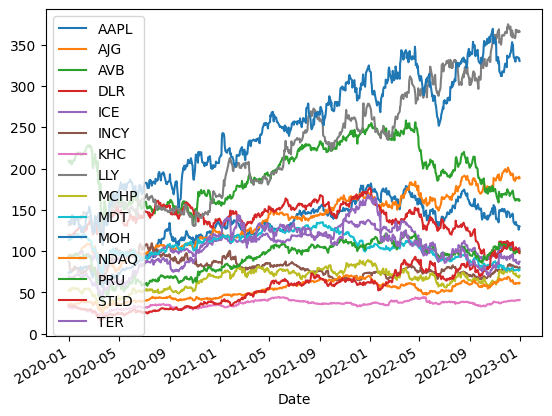

In [12]:
prices.plot()

In [21]:
returns = prices.pct_change().dropna()*100

In [22]:
returns

,AAPL,AJG,AVB,DLR,ICE,INCY,KHC,LLY,MCHP,MDT,MOH,NDAQ,PRU,STLD,TER
Date,,,,,,,,,,,,,,,
2020-01-02,2.28,0.29,-1.17,-1.45,0.13,-1.55,-1.62,0.59,2.75,0.98,-1.71,0.67,1.17,-0.71,2.19
2020-01-03,-0.97,-0.21,0.96,1.64,2.16,-9.39,-1.17,-0.33,-2.19,-0.59,-0.62,0.43,-1.67,-1.78,-2.08
2020-01-06,0.80,0.46,0.17,-0.90,0.03,-0.72,0.22,0.37,-1.43,0.89,3.63,-0.06,0.25,-0.30,-2.17
2020-01-07,-0.47,-1.08,-2.18,-0.98,-0.29,-0.26,-1.76,0.19,6.71,-0.35,1.39,-1.65,-0.11,2.21,2.20
2020-01-08,1.61,0.14,0.41,0.87,-0.88,-0.79,-0.55,0.91,-1.26,1.76,3.25,-0.55,0.64,0.09,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.28,0.20,0.73,1.01,0.34,0.30,0.40,0.71,0.03,0.47,-0.07,0.36,0.91,-0.25,0.52
2022-12-27,-1.39,0.46,-0.14,-0.52,-0.68,-2.18,1.09,-0.82,-1.29,0.18,-0.21,-0.49,-0.21,0.30,-2.08
2022-12-28,-3.07,-0.70,-1.06,-0.95,0.16,-0.19,-1.27,0.09,-1.68,-1.73,-0.58,-0.46,-0.99,-2.93,-0.61


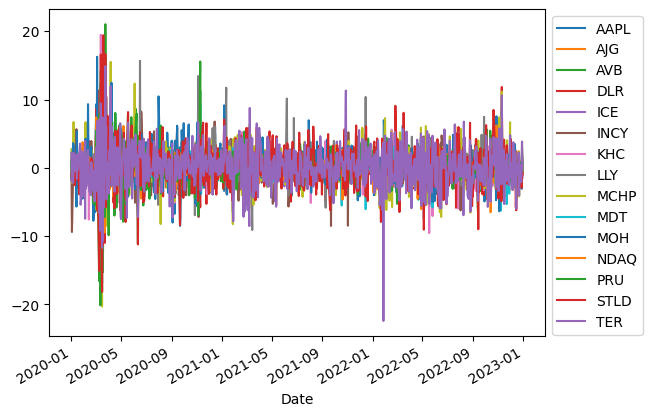

In [23]:
returns.plot()
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Column Information (factors.csv)

__The Return of the risk-free Asset:__<br>
__RF:__ the one-month Treasury bill rate (from Ibbotson Associates).

__Fama/French 5 Factors:__

- The "MARKET RISK" factor: <br>
__MktPrem__: Market Risk Premium (Rm-Rf). The excess return of the market portfolio (Rm) over the risk-free asset (Rf). Market Portfolio Return: Value-weight return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ.

- The "SIZE" factor: <br>
__SMB__: SMB (Small Minus Big Company Size) is the average return on nine small stock portfolios minus the average return on nine big stock portfolios. 

- The "VALUE" factor: <br>
__HML__: HML (High Minus Low [Book Value/Market Value]) is the average return on two value portfolios (high book value/market value) minus the average return on two growth portfolios (low book value/market value).

- The "OPERATING PROFITABILITY" factor: <br>
__RMW__: RMW (Robust Minus Weak) is the average return on two robust operating profitability portfolios minus the average return on two weak operating profitability portfolios.

- The "INVESTMENT" factor: <br>
__CMA__: CMA (Conservative Minus Aggressive) is the average return on two conservative investment portfolios minus the average return on two aggressive investment portfolios.

In [24]:
factors = pd.read_csv('factors.csv',index_col='Date',parse_dates=(['Date']))

In [25]:
factors.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mkt_Prem  756 non-null    float64
 1   SMB       756 non-null    float64
 2   HML       756 non-null    float64
 3   RMW       756 non-null    float64
 4   CMA       756 non-null    float64
 5   RF        756 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


<AxesSubplot:xlabel='Date'>

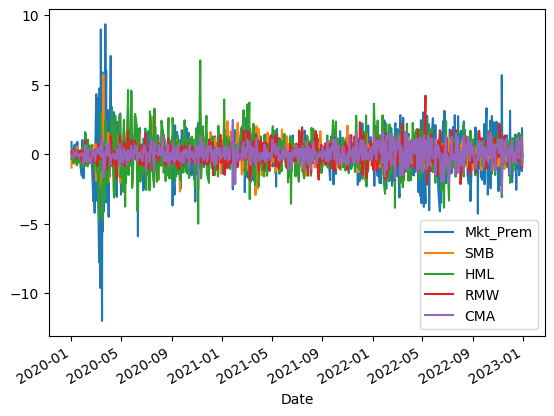

In [27]:
factors.drop(['RF'],axis=1).plot()

In [28]:
five_factors = factors.drop(['RF'],axis=1).columns.to_list()

In [29]:
five_factors

['Mkt_Prem', 'SMB', 'HML', 'RMW', 'CMA']

In [56]:
data = pd.concat([returns,factors],axis=1,join='inner')

In [57]:
data

,AAPL,AJG,AVB,DLR,ICE,INCY,KHC,LLY,MCHP,MDT,...,NDAQ,PRU,STLD,TER,Mkt_Prem,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,2.28,0.29,-1.17,-1.45,0.13,-1.55,-1.62,0.59,2.75,0.98,...,0.67,1.17,-0.71,2.19,0.86,-0.97,-0.34,0.24,-0.22,0.01
2020-01-03,-0.97,-0.21,0.96,1.64,2.16,-9.39,-1.17,-0.33,-2.19,-0.59,...,0.43,-1.67,-1.78,-2.08,-0.67,0.30,0.01,-0.14,-0.10,0.01
2020-01-06,0.80,0.46,0.17,-0.90,0.03,-0.72,0.22,0.37,-1.43,0.89,...,-0.06,0.25,-0.30,-2.17,0.36,-0.21,-0.55,-0.17,-0.26,0.01
2020-01-07,-0.47,-1.08,-2.18,-0.98,-0.29,-0.26,-1.76,0.19,6.71,-0.35,...,-1.65,-0.11,2.21,2.20,-0.19,-0.03,-0.25,-0.13,-0.25,0.01
2020-01-08,1.61,0.14,0.41,0.87,-0.88,-0.79,-0.55,0.91,-1.26,1.76,...,-0.55,0.64,0.09,0.12,0.47,-0.17,-0.64,-0.20,-0.17,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.28,0.20,0.73,1.01,0.34,0.30,0.40,0.71,0.03,0.47,...,0.36,0.91,-0.25,0.52,0.51,-0.34,1.15,0.86,0.46,0.02
2022-12-27,-1.39,0.46,-0.14,-0.52,-0.68,-2.18,1.09,-0.82,-1.29,0.18,...,-0.49,-0.21,0.30,-2.08,-0.51,-0.42,1.43,1.13,1.19,0.02
2022-12-28,-3.07,-0.70,-1.06,-0.95,0.16,-0.19,-1.27,0.09,-1.68,-1.73,...,-0.46,-0.99,-2.93,-0.61,-1.23,-0.30,-0.29,-0.96,-0.03,0.02


In [59]:
data[symbols] = data[symbols].sub(data['RF'],axis=0)

In [60]:
data = data.drop(['RF'],axis=1)

In [61]:
data

,AAPL,AJG,AVB,DLR,ICE,INCY,KHC,LLY,MCHP,MDT,MOH,NDAQ,PRU,STLD,TER,Mkt_Prem,SMB,HML,RMW,CMA
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,2.28,0.29,-1.18,-1.46,0.12,-1.55,-1.62,0.59,2.74,0.97,-1.72,0.67,1.17,-0.71,2.18,0.86,-0.97,-0.34,0.24,-0.22
2020-01-03,-0.98,-0.22,0.95,1.64,2.15,-9.39,-1.18,-0.34,-2.20,-0.60,-0.63,0.42,-1.67,-1.78,-2.09,-0.67,0.30,0.01,-0.14,-0.10
2020-01-06,0.79,0.46,0.16,-0.91,0.03,-0.72,0.22,0.37,-1.44,0.88,3.62,-0.07,0.24,-0.31,-2.18,0.36,-0.21,-0.55,-0.17,-0.26
2020-01-07,-0.48,-1.08,-2.18,-0.99,-0.29,-0.26,-1.76,0.18,6.70,-0.35,1.38,-1.66,-0.11,2.20,2.20,-0.19,-0.03,-0.25,-0.13,-0.25
2020-01-08,1.60,0.13,0.41,0.86,-0.88,-0.80,-0.56,0.90,-1.27,1.75,3.24,-0.56,0.64,0.08,0.11,0.47,-0.17,-0.64,-0.20,-0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.30,0.19,0.71,1.00,0.33,0.28,0.38,0.69,0.01,0.45,-0.09,0.34,0.90,-0.27,0.51,0.51,-0.34,1.15,0.86,0.46
2022-12-27,-1.40,0.45,-0.16,-0.53,-0.70,-2.19,1.07,-0.84,-1.30,0.16,-0.23,-0.51,-0.23,0.29,-2.10,-0.51,-0.42,1.43,1.13,1.19
2022-12-28,-3.08,-0.72,-1.07,-0.96,0.14,-0.20,-1.29,0.08,-1.70,-1.74,-0.60,-0.48,-1.00,-2.94,-0.63,-1.23,-0.30,-0.29,-0.96,-0.03


In [66]:
filter_list = five_factors + ['AAPL']

In [67]:
apple_stock = data[filter_list]

In [68]:
apple_stock

,Mkt_Prem,SMB,HML,RMW,CMA,AAPL
Date,,,,,,
2020-01-02,0.86,-0.97,-0.34,0.24,-0.22,2.28
2020-01-03,-0.67,0.30,0.01,-0.14,-0.10,-0.98
2020-01-06,0.36,-0.21,-0.55,-0.17,-0.26,0.79
2020-01-07,-0.19,-0.03,-0.25,-0.13,-0.25,-0.48
2020-01-08,0.47,-0.17,-0.64,-0.20,-0.17,1.60
...,...,...,...,...,...,...
2022-12-23,0.51,-0.34,1.15,0.86,0.46,-0.30
2022-12-27,-0.51,-0.42,1.43,1.13,1.19,-1.40
2022-12-28,-1.23,-0.30,-0.29,-0.96,-0.03,-3.08


In [70]:
apple_stock.corr()

,Mkt_Prem,SMB,HML,RMW,CMA,AAPL
Mkt_Prem,1.00,0.20,-0.04,-0.14,-0.30,0.82
SMB,0.20,1.00,0.33,-0.23,0.01,-0.06
HML,-0.04,0.33,1.00,0.46,0.64,-0.26
RMW,-0.14,-0.23,0.46,1.00,0.42,-0.06
CMA,-0.30,0.01,0.64,0.42,1.00,-0.21
AAPL,0.82,-0.06,-0.26,-0.06,-0.21,1.00


<AxesSubplot:>

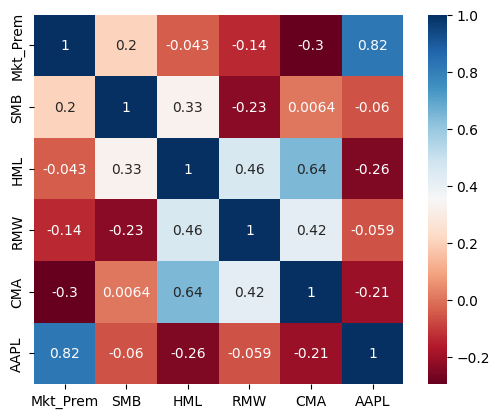

In [71]:
sns.heatmap(apple_stock.corr(),cmap='RdBu',square=True,annot=True)

Mkt_Prem has the most correlation with the dependent variable AAPL

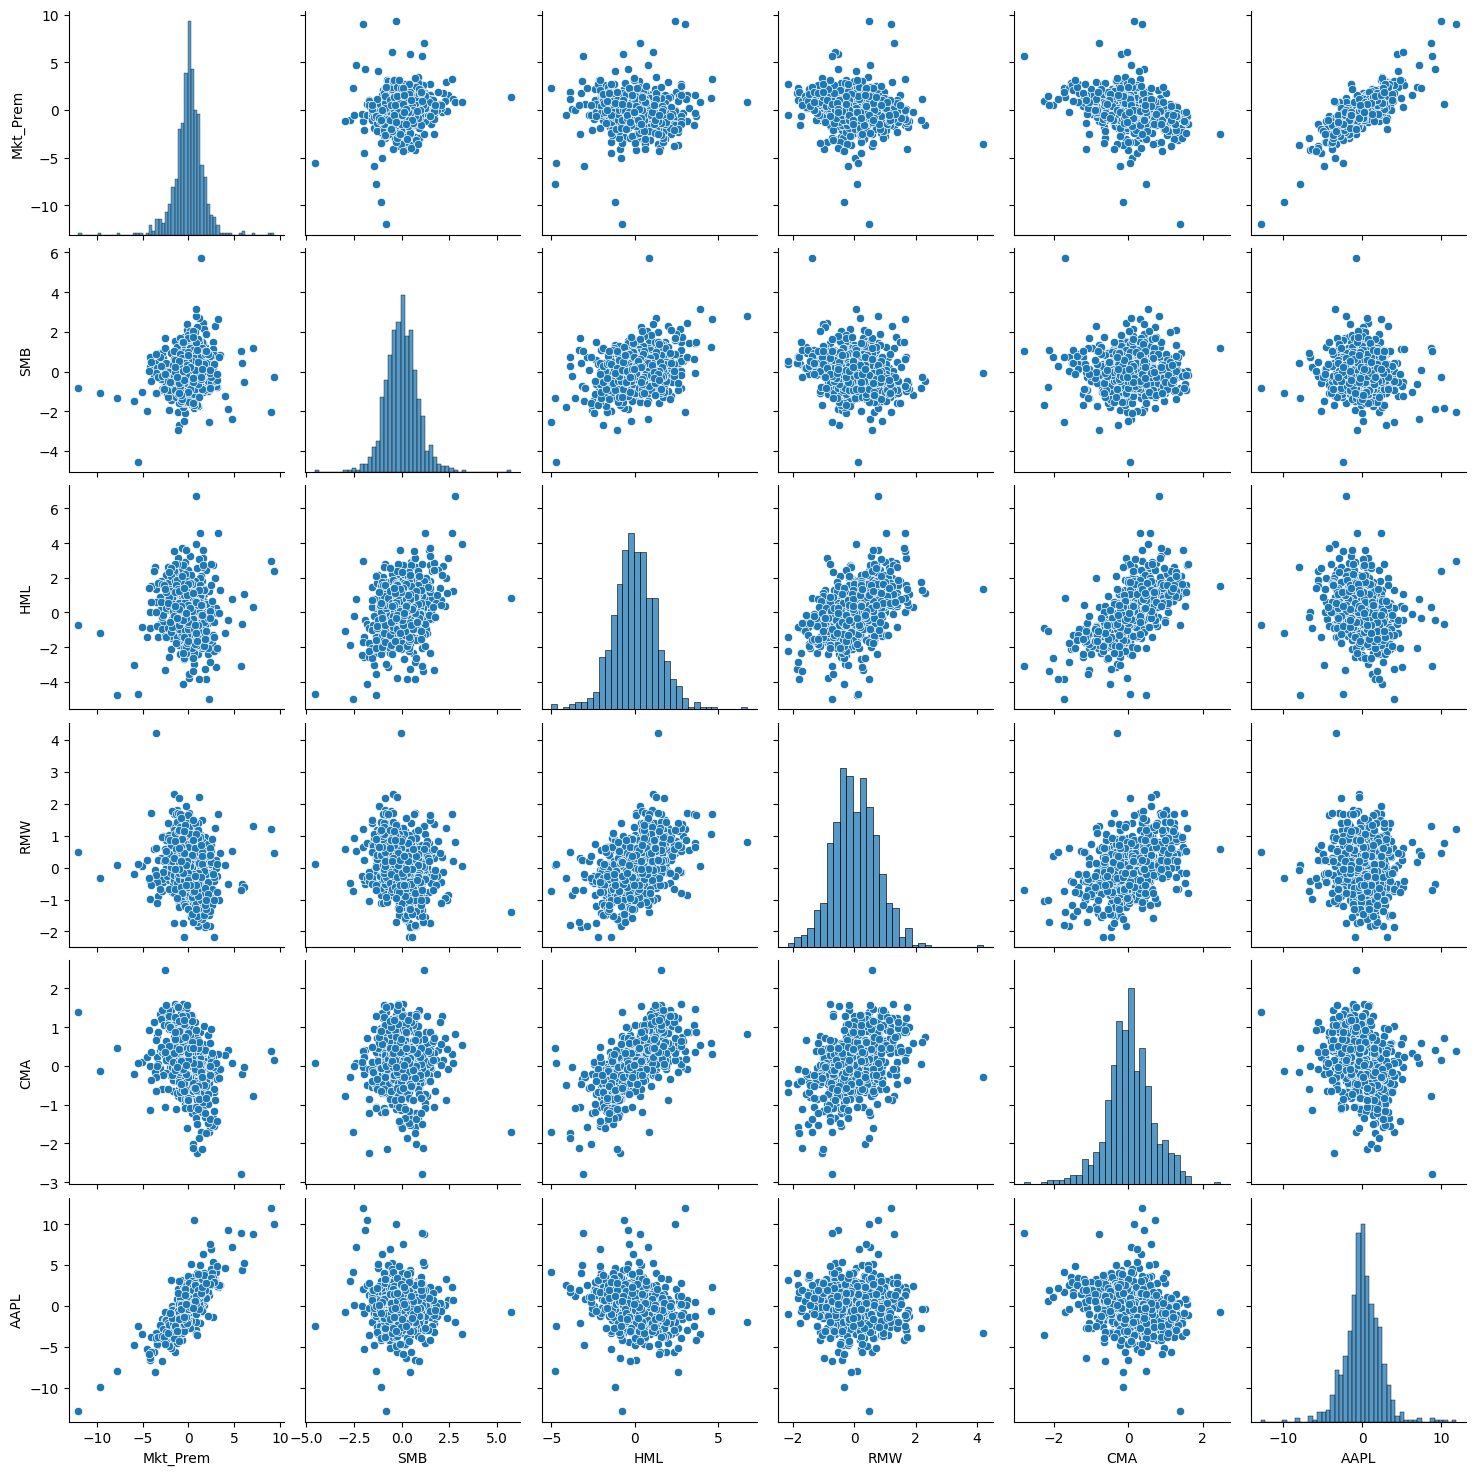

In [72]:
sns.pairplot(apple_stock)

<AxesSubplot:xlabel='AAPL', ylabel='Mkt_Prem'>

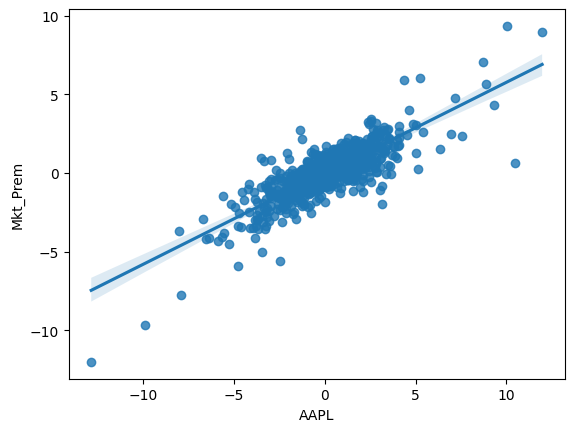

In [74]:
sns.regplot(x='AAPL',y='Mkt_Prem',data=apple_stock)

In [78]:
model = smf.ols('AAPL ~ Mkt_Prem + SMB + HML + RMW + CMA',data = apple_stock)

In [79]:
result = model.fit()

In [80]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     615.7
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          1.29e-262
Time:                        21:51:14   Log-Likelihood:                -1094.5
No. Observations:                 756   AIC:                             2201.
Df Residuals:                     750   BIC:                             2229.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.038      0.438      0.661      -0.058       0.091
Mkt_Prem       1.3084      0.025     52.765      0.000       1.260       1.357
SMB           -0.1903      0.053     -3.564      0.000      -0.295      -0.085
HML           -0.7681      0.045    -17.063      0.000      -0.857      -0.680
RMW            0.4220      0.065      6.502      0.000       0.295       0.549
CMA            1.0952      0.086     12.768      0.000       0.927       1.264
==============================================================================
Omnibus:                      137.137   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              839.010
Skew:                           0.656   Prob(JB):                    6.47e-183
Kurtosis:                       7.991   Cond. No.                         4.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
coef = pd.DataFrame(columns=['Intercept','Mkt_Prem','SMB','HML','RMW','CMA'])
signif = pd.DataFrame(columns = ['Intercept','Mkt_Prem','SMB','HML','RMW','CMA'])

for i in symbols:
    stock = data[five_factors + [i]]
    model = smf.ols(i +'~ Mkt_Prem + SMB + HML + RMW + CMA',data=stock)
    results = model.fit()
    coef.loc[i] = results.params
    signif.loc[i] = results.pvalues < 0.05
    signif.loc[i,'rsquared'] = results.rsquared

In [83]:
coef

,Intercept,Mkt_Prem,SMB,HML,RMW,CMA
AAPL,0.02,1.31,-0.19,-0.77,0.42,1.10
AJG,0.07,0.88,-0.25,0.24,0.07,-0.15
AVB,-0.06,0.88,-0.02,0.43,0.15,-0.11
DLR,-0.04,0.86,-0.48,-0.17,0.03,0.28
ICE,0.01,0.83,-0.32,0.12,-0.19,-0.10
INCY,-0.01,0.66,-0.12,-0.29,-0.34,0.41
KHC,-0.02,0.79,-0.34,0.19,0.20,0.77
LLY,0.10,0.74,-0.34,-0.28,0.13,0.82
MCHP,0.03,1.47,0.52,-0.28,0.30,-0.11
MDT,-0.07,0.82,-0.05,0.37,-0.00,-0.17


In [85]:
signif

,Intercept,Mkt_Prem,SMB,HML,RMW,CMA,rsquared
AAPL,False,True,True,True,True,True,0.80
AJG,False,True,True,True,False,False,0.58
AVB,False,True,False,True,False,False,0.49
DLR,False,True,True,True,False,True,0.40
ICE,False,True,True,True,True,False,0.55
INCY,False,True,False,True,True,True,0.28
KHC,False,True,True,True,True,True,0.42
LLY,False,True,True,True,False,True,0.28
MCHP,False,True,True,True,True,False,0.67
MDT,False,True,False,True,False,False,0.54


In [86]:
signif[five_factors].mean().sort_values(ascending=False).mul(100)

Mkt_Prem   100.00
HML         86.67
SMB         66.67
CMA         46.67
RMW         40.00
dtype: float64

The Market Premium is always significant and the marginal benefits of adding more factors is declining.

In [87]:
signif['rsquared'].mean()

0.5282455279880509

On average the Fama/French 5 factor model explains about 53% of the Stock performance.